## Modelo de classificação não supervisionado

In [239]:
### importando bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import Normalizer
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.pipeline import make_pipeline
import warnings
warnings.filterwarnings('ignore')

In [240]:
### Importando dados
df = pd.read_excel('economatica_retornos.xlsx', skiprows=3, index_col=0)


#### Tratando os dados

In [241]:
def columns(df): #renomeando colunas com as ações
    df.columns = df.columns.str[59:]
columns(df)

In [242]:
df.replace('-', np.nan, inplace=True)
df = df.dropna()

In [243]:
df.head()

,RRRP3,ALPA4,ABEV3,AMER3,ASAI3,AZUL4,B3SA3,BIDI11,BPAN4,BBSE3,...,VIVT3,TIMS3,TOTS3,UGPA3,USIM5,VALE3,VIIA3,VBBR3,WEGE3,YDUQ3
Data,,,,,,,,,,,,,,,,,,,,,
2021-11-22,0.413793,-4.343786,-0.402530,-6.583259,-2.059659,-2.017291,-2.967121,-14.114188,-4.366812,-1.844354,...,-2.037736,1.706231,-6.285391,-2.649007,2.938776,5.559894,-0.174825,-1.623816,-3.129366,-2.723214
2021-11-23,5.357143,-1.991258,-0.692841,-0.223214,0.507614,-1.102941,-0.991736,-0.713267,-1.369863,-1.374885,...,-1.771957,1.094092,-4.984894,4.988662,4.758128,2.633526,3.677758,2.842733,-1.471012,-2.202845
2021-11-24,-2.868318,0.148662,-0.581395,2.205177,-1.010101,-1.263941,1.752922,4.022989,5.185185,0.511152,...,-0.450980,0.649351,2.130366,-0.359971,3.482210,2.320888,-0.844595,-1.471244,-1.844262,1.877053
2021-11-25,-0.302013,3.240970,0.760234,1.563477,0.947522,2.221386,1.476620,3.756906,8.274648,2.311604,...,1.043924,1.863799,0.840598,2.167630,1.097293,-0.676247,1.362862,0.769231,0.805249,2.257024
2021-11-26,-7.101986,-3.977954,-3.134068,-6.219212,-3.537906,-14.180479,-4.769604,-3.940362,-6.747967,-2.711252,...,-0.896686,-2.392681,-3.272615,-3.536068,-6.584660,-2.638298,-4.537815,-2.694207,-3.284024,-5.900901


In [244]:
X = df.values
X = X.T

#### Rodando o modelo

In [245]:
### Encontrando número ideal de clusters
ks = range(1, 8)
inertia = []
for k in ks:
    model = KMeans()
    model.fit(X)
    inertia.append(model.inertia_)

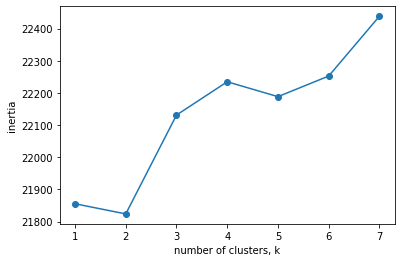

In [246]:
### Plotando gráficos
plt.plot(ks, inertia, '-o')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()

In [247]:
clusters = 5 ### quantidade de clusters que o modelo terá
model = KMeans(n_clusters=clusters)
model.fit(X)

KMeans(n_clusters=5)

In [248]:
### Previsão
labels = model.predict(X)

#### Plotando gráfico

In [249]:
px = X[:,0]
py = X[:,-1]
centro = model.cluster_centers_
centro_x = centro[:,0]
centro_y = centro[:,1]

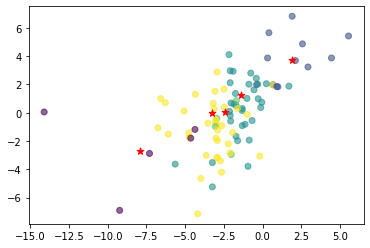

In [250]:
plt.scatter(px, py, c=labels, alpha=0.6)
plt.scatter(centro_x, centro_y, marker='*', s=50, color='r')
plt.show()

In [251]:
result = pd.DataFrame({'labels':labels, 'companies':df.columns})

In [252]:
### Configurando o DataFrame
pd.set_option('max_rows', None)
result.sort_values('labels')

,labels,companies
61,0,CASH3
59,0,MGLU3
57,0,LWSA3
7,0,BIDI11
8,0,BPAN4
0,1,RRRP3
77,1,CSNA3
26,1,CMIN3
41,1,GGBR4
42,1,GOAU4


#### Hierarchical clustering

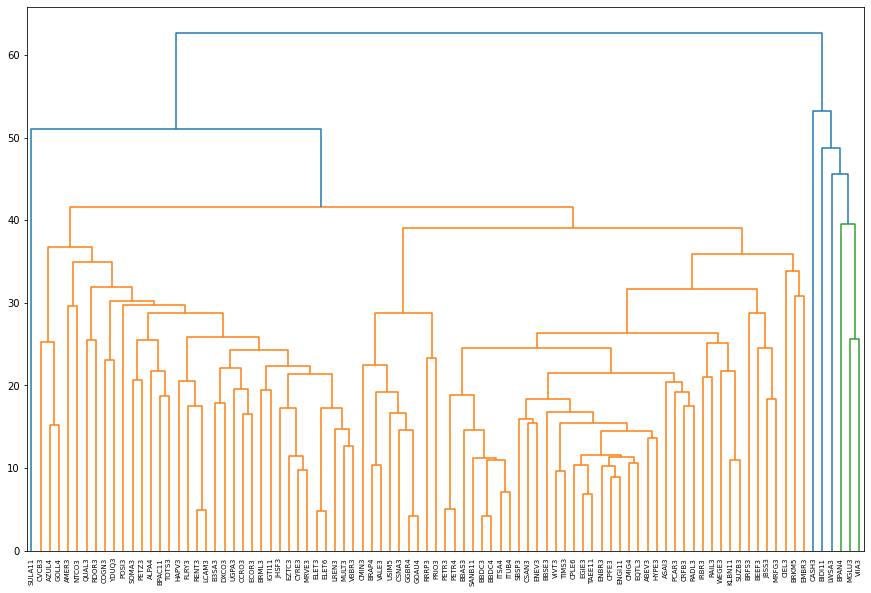

In [253]:
merge = linkage(X, method='complete')
plt.figure(figsize=[15,10])
dendrogram(merge,
            labels=df.columns,
            leaf_font_size=7,
            leaf_rotation=90)

plt.show()